## 1 ANOVA Test

ANOVA stands for Analysis of Variance.

### 1.1 Assumptions for ANOVA

1. ANOVA is used for **Numerical vs Categorical** features.
2. Total number of categories in a feature can be greater than two.

#### Why ANOVA tests for mean?

ANOVA tests if the difference in various groups are statistically significant. ANOVA is analysis of variance, since variance is calculated using mean, Null and Alternate Hypothesis are formulated around means of groups.  


> **Note**:
>
> Groups and categories are the same. Samples from a Categorical feature.

### 1.2 Conditions for ANOVA

1. Normality of data: Data (samples) should be normally distributed.
2. Homogeneous Variance: Equal variance among each groups (samples).
3. Independent Observations: Data-points must be independent of one another.

> **Note**:
>
> Sample size of groups can be different.

### 1.3 T-test vs ANOVA

Below are the reasons why ANOVA is preferred over T-test when group/category count is greater than 2.

#### High Test Count

1. Since T-test supports at most two groups at a time, it requires $^n\text{C}_2$ number of tests when n > 2.
2. For example 10 categories/groups require $^{10}\text{C}_2 = 45$ number of T-tests.

#### Compounding Errors

1. Errors keeps compounding as number of tests increases.
2. For example a significance level $(\alpha)$ of $5\%$ a.k.a margin of error for 100 tests = $5\% \times 5\% \times \cdots \times 5\%$ (100 times).
3. More the number of tests higher the margin of error.

### 1.4 Types of ANOVA

1. One-way ANOVA
2. Two-way ANOVA

## 2 One-way ANOVA

### 2.1 Nature of Hypothesis

- $H_0: \text{There is NO significant difference in mean among the groups}$
- $H_a: \text{There is at least one group with significantly different mean}$

### 2.2 Test Statistic

1. ANOVA uses F-Distribution.
2. The name of the test statistic used in ANOVA is called as F-Ratio.

$
\begin{align}
\large
\text{F-Ratio} = \frac{\text{Variance between the groups}}{\text{Variance within the groups}}
\end{align}
$

#### F-Ratio vs p-value

$
\begin{align}
\large
\text{F-Ratio} \propto \frac{1}{\text{p-value}}
\end{align}
$

Therefore,  

1. As variance between the group increases, $\text{F-Ratio}$ increases hence $\text{p-value}$ decreases.
2. As variance within the group increases, $\text{F-Ratio}$ decreases hence $\text{p-value}$ increases.

### 2.3 API

```python
from scipy.stats import f_oneway
```

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

### 2.4 Examples

#### Setup

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import f_oneway, ttest_ind

##### Import Dataset

In [2]:
af_df = pd.read_csv("../0_data/02_aerofit/aerofit_treadmill.csv")
row_count, col_count = af_df.shape

display(af_df.head(3))
print(f"Dataset has {row_count} rows and {col_count} columns.")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


Dataset has 180 rows and 9 columns.


##### Create Groups

###### Group: KP281

In [3]:
mask = af_df["Product"] == "KP281"
kp_281 = af_df[mask]
kp_281.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


###### Group: KP481

In [4]:
mask = af_df["Product"] == "KP481"
kp_481 = af_df[mask]
kp_481.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,KP481,19,Male,14,Single,3,3,31836,64
81,KP481,20,Male,14,Single,2,3,32973,53


###### Group: KP781

In [5]:
mask = af_df["Product"] == "KP781"
kp_781 = af_df[mask]
kp_781.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,KP781,22,Male,14,Single,4,3,48658,106
141,KP781,22,Male,16,Single,3,5,54781,120


#### One-way ANOVA test

##### STEP #1: Formulate Hypothesis

In [6]:
# H_0: NO significant difference in mean among the groups
# H_a: There is some difference in at least ONE of the group

##### STEP #2: Select Significance level

In [7]:
alpha = 0.05

##### STEP #3: Select type of test

In One-way ANOVA its always right tailed test.

##### STEP #4: Calculate test-statistic and p-value

In [8]:
test_stat, p_value = f_oneway(kp_281["Income"], kp_481["Income"], kp_781["Income"])
print("F-ratio:", test_stat.item())
print("p-value:", p_value.item())

F-ratio: 89.25903546601671
p-value: 1.564499131634248e-27


##### STEP #5: Compare p-value with significance level

In [9]:
if p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

Reject Null hypothesis


#### Independent two sample T-test

In [10]:
alpha = 0.05

##### Between Groups KP281 and KP481

In [11]:
# H_0: mu_KP281 = mu_KP481
# H_a: mu_KP281 != mu_KP481

test_stat, p_value = ttest_ind(a=kp_281["Income"], b=kp_481["Income"], alternative="two-sided")
print("T-statistic:", test_stat.item())
print("p-value:", p_value.item())

if p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

T-statistic: -1.6817688139914835
p-value: 0.09487529747264932
Failed to reject Null hypothesis


In [12]:
# H_0: mu_KP481 = mu_KP281
# H_a: mu_KP481 > mu_KP281

test_stat, p_value = ttest_ind(a=kp_481["Income"], b=kp_281["Income"], alternative="greater")
print("T-statistic:", test_stat.item())
print("p-value:", p_value.item())

if p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

T-statistic: 1.6817688139914835
p-value: 0.04743764873632466
Reject Null hypothesis


##### Between Groups KP281 and KP781

In [13]:
# H_0: mu_KP281 = mu_KP781
# H_a: mu_KP281 != mu_KP781

test_stat, p_value = ttest_ind(a=kp_281["Income"], b=kp_781["Income"], alternative="two-sided")
print("T-statistic:", test_stat.item())
print("p-value:", p_value.item())

if p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

T-statistic: -11.551787854717519
p-value: 4.116508528877672e-21
Reject Null hypothesis


##### Between Groups KP481 and KP781

In [14]:
# H_0: mu_KP481 = mu_KP781
# H_a: mu_KP481 != mu_KP781

test_stat, p_value = ttest_ind(a=kp_481["Income"], b=kp_781["Income"], alternative="two-sided")
print("T-statistic:", test_stat.item())
print("p-value:", p_value.item())

if p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

T-statistic: -9.628009470104809
p-value: 7.770191623361236e-16
Reject Null hypothesis


## 3 Two-way ANOVA

### 3.1 Independent vs Dependent Variables

There are two types of variables:

1. Independent variable
2. Dependent variable

Mathematically,

$y = f(x)$

1. There can be multiple independent variables and single dependent variable.
2. Dependent variable is also called as Target.

#### Factor vs Target

1. Factor := A Factor is an independent variable in set $X$
2. Target := A Target is a Dependent variable $Y$

There are two Factors and one Target in Two-way ANOVA.

### 3.2 Effects in Two-way ANOVA

There are two types of effects in Two-way ANOVA:

1. Main Effect
2. Interaction Effect

#### Main Effect

Main effect := Effect of two factors on target mean

#### Interaction Effect

Interaction effect := Effect of interaction between two factors on target mean

### 3.3 Nature of Hypothesis

##### Factor A

- $H_0$ : NO significant difference in target mean among the groups in factor A
- $H_a$ : At least one of the group in factor A have significantly different mean

##### Factor B

- $H_0$ : NO significant difference in target mean among the groups in factor B
- $H_a$ : At least one of the group in factor B have significantly different mean

##### Factor A vs Factor B

- $H_0$ : NO interaction between factor A and factor B
- $H_a$ : There is significant interaction between factor A and factor B

### 3.4 Test Statistic

1. Two-way ANOVA uses F distribution.
2. The name of the test statistic used in Two-way ANOVA is called as F-Statistic.

### 3.5 API

```python
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
```

https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html

### 3.4 Examples

#### Setup

In [15]:
import numpy as np
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

##### Import Dataset

In [16]:
cc_df = pd.read_csv("../0_data/03_coca_cola/coca_cola_sales.csv")
row_count, col_count = cc_df.shape

display(cc_df.head(3))
print(f"Dataset has {row_count} rows and {col_count} columns.")

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170


Dataset has 100 rows and 3 columns.


##### EDA

In [17]:
cc_df["Flavour"].value_counts()

Flavour
Cola      36
Lemon     33
Orange    31
Name: count, dtype: int64

In [18]:
cc_df["Location"].value_counts()

Location
East     34
West     25
North    22
South    19
Name: count, dtype: int64

<Axes: ylabel='Density'>

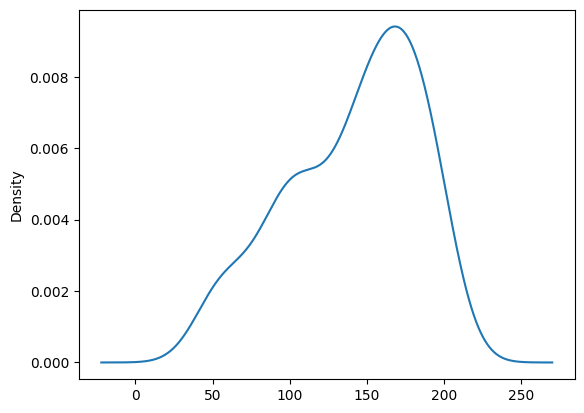

In [19]:
cc_df["Sales"].plot(kind="kde")

#### Helper Function

In [20]:
def two_way_anova(df: pd.DataFrame, factor_a: str, factor_b: str, target: str) -> pd.DataFrame:
    """
    Function to perform two-way ANOVA.
    """
    # Define formula.
    formula = f"{target} ~ C({factor_a}) * C({factor_b})"

    # Fit model with interaction term.
    model = ols(formula, data=df).fit()

    # Generate ANOVA table.
    table_df = anova_lm(model, typ=2)

    # Rename indexes and columns.
    table_df.rename(
        columns={"PR(>F)": "p_values"},
        index={
            f"C({factor_a})": factor_a,
            f"C({factor_b})": factor_b,
            f"C({factor_a}):C({factor_b})": "Interaction",
        },
        inplace=True,
    )

    return table_df

#### Two-way ANOVA test

##### STEP #1: Formulate Hypothesis

In [21]:
# Main effect

# Factor A:
# H_0: NO significant difference in mean sales among different flavors
# H_a: At least one of the flavors have significantly different mean sales

# Factor B:
# H_0: NO significant difference in mean sales among different locations
# H_a: At least one of the locations have significantly different mean sales

In [22]:
# Interaction effect
# H_0: Interaction between flavors and location is NOT affecting sales
# H_a: There is significant interaction between flavors and locations affecting sales

##### STEP #2: Select Significance Level

In [23]:
alpha = 0.05

##### STEP #3: Select type of test

In two-way ANOVA its always right tailed F-test.

##### STEP #4: Compute p-value

In [24]:
cc_df.columns.to_list()

['Flavour', 'Location', 'Sales']

In [25]:
twa_op = two_way_anova(df=cc_df, factor_a="Flavour", factor_b="Location", target="Sales")
twa_op

,sum_sq,df,F,p_values
Flavour,6919.558981,2.0,1.968465,0.145773
Location,2059.273884,3.0,0.390546,0.760092
Interaction,11802.257765,6.0,1.119163,0.357804
Residual,154669.016331,88.0,NaN,NaN


##### STEP #5: Compare p-value with significance level

In [26]:
f1_p_value = twa_op.loc["Flavour", "p_values"].item()
f2_p_value = twa_op.loc["Location", "p_values"].item()
int_p_value = twa_op.loc["Interaction", "p_values"].item()

In [27]:
if f1_p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

Failed to reject Null hypothesis


There is NO significant difference in mean sales among different flavors.

In [28]:
if f2_p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

Failed to reject Null hypothesis


There is NO significant difference in mean sales among different locations.

In [29]:
if int_p_value < alpha:
    print("Reject Null hypothesis")
else:
    print("Failed to reject Null hypothesis")

Failed to reject Null hypothesis


Interaction between flavors and location is NOT affecting sales.